# Midterm Part 1 - _Due Monday, September 19_
---
## Note: this is part of the midterm. It is _not_ a paired programming assignment. **You must complete this lab _on your own_**. 
---
### We'll be exploring the Pokemon dataset from [Kaggle](http://www.kaggle.com).
The dataset was downloaded from https://www.kaggle.com/abcsds/pokemon. 

1. sign up or log in
2. accept terms and conditions (if necessary)
3. download `pokemon.zip`
4. unzip it to your local directory

After loading and cleaning the data:

+ **SQL**: 
    - Which Pokemon seems the most useful (largest `Total` value)?
    - Come up with at least one other question that can be answered using SQL (and answer it).
+ **EDA**: 
    - Calculate the percent of distinct Pokemon that are Legendary (distinct means unique Pokemon `#`).
    - Make at least one barplot of a categorical variable
    - Make at least one boxplot of continuous variables
    - Make at least one boxplot of continuous variables grouped by a categorical variable
+ **EDA/Statistics**: 
    - Calculate the mean and standard deviation of the `total` column for each Pokemon Type 1.
    - Calculate the mean and standard deviation of at least one other continuous variable
+ **Statistics/Random Sampling** - For the following questions, draw a sample of 100:
    - Compare sample statistics & population statistics for Attack points.
    - Make histograms of the Attack points sample & Attack points population.
    - Compare sample statistics & population statistics for at least one other continuous variable.
    - Make histograms of the Attack points sample & at least one other continuous variable in the population.
+ **Probability**: Assume you are a Pokemaster and have caught every Pokemon. You pick 6 Pokemon at random to carry.
     - What's the probability that they are all Water type? (probability of a Pokemon with Type 1 or Type 2 of `Water`)
     - Come up with at least one more scenario for your set of six Pokemon and compute the probability of getting it.

***
## Setup & clean the data
### First, load the packages that will be used in this notebook.

In [1]:
%pylab inline

import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine

random.seed(1234)
sns.set(font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


### Next, load the csv file into a DataFrame and look at the first few lines.

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Here are some variable descriptions from the Kaggle website:

|Variable|Description|
|:-:|:--|
|**#**|ID for each pokemon|
|**Name**|Name of each pokemon|
|**Type 1**|Each pokemon has a type, this determines weakness/resistance to attacks|
|**Type 2**|Some pokemon are dual type and have 2|
|**Total**|sum of all stats that come after this, a general guide to how strong a pokemon is|
|**HP**|hit points, or health, defines how much damage a pokemon can withstand before fainting|
|**Attack**|the base modifier for normal attacks (eg. Scratch, Punch)|
|**Defense**|the base damage resistance against normal attacks|
|**SP. Atk**|special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)|
|**SP. Def**|the base damage resistance against special attacks|
|**Speed**|determines which pokemon attacks first each round|
|**Generation**|the number of the generation a pokemon belongs to
|**Legendary**|boolean value indicating if a pokemon is Legendary (True) or not Legendary (False)|

Notice that there are multiple entries for Pokemon \#3 (Venusaur). We won't be able to set `#` as the index since it contains duplicates.

We can also modify the column names to get rid of periods and spaces. The column names should also be lowercased for use with SQLite.

In [3]:
# Lowercase and replace periods & spaces in the column names
new_names = []

for col in df.columns:
    new_names.append(col.replace('.', '', len(col)).replace(' ', '', len(col)).lower())

df.columns = new_names

print(df.columns)

Index(['#', 'name', 'type1', 'type2', 'total', 'hp', 'attack', 'defense',
       'spatk', 'spdef', 'speed', 'generation', 'legendary'],
      dtype='object')


Let's also convert `Legendary` to a binary column, where `1` represents `True` and `0` represents `False`.

Python's lambda functions are useful for defining functions in-line. You can read more at:<br>
https://pythonconquerstheuniverse.wordpress.com/2011/08/29/lambda_tutorial/<br>
http://stackoverflow.com/questions/890128/why-are-python-lambdas-useful

In [4]:
df['legendary'] = df['legendary'].apply(lambda x: 1 if x == True else 0)
df.head()

,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


### Next, load the data into SQL

First we'll need to create a database, then create a table in our new database.

In [5]:
# Create pokemon table in pokemon database (only run this once!)
engine = create_engine('sqlite:///pokemon.db')
conn = engine.connect()
df.to_sql('pokemon', conn)

## SQL

In [5]:
%load_ext sql

//anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
//anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [6]:
%sql sqlite:///pokemon.db

'Connected: None@pokemon.db'

In [7]:
%%sql
SELECT name FROM sqlite_master WHERE type = "table";

Done.


name
pokemon


In [9]:
%%sql
SELECT name, total, hp, defense FROM pokemon WHERE total = (SELECT MAX(total) FROM pokemon);

Done.


name,total,hp,defense
MewtwoMega Mewtwo X,780,106,100
MewtwoMega Mewtwo Y,780,106,70
RayquazaMega Rayquaza,780,105,100


Since there's a tie in 'total', I would choose based on 'hp' as I think it's a good metric to break the tie (as it defines how much damage a Pokemon can withstand). Since there's a further tie, I choose 'defense' as criteria (resistance against normal attacks) to make the final selection: MewtwoMega Mewtwo X.

In [87]:
%%sql
SELECT COUNT(*) AS Count,
    CASE
        WHEN generation = "1" THEN "Generation 1"
        WHEN generation = "2" THEN "Generation 2"
        WHEN generation = "3" THEN "Generation 3"
        WHEN generation = "4" THEN "Generation 4"
        WHEN generation = "5" THEN "Generation 5"
        WHEN generation = "6" THEN "Generation 6"
        ELSE "Unknown"
        END AS "Generations"
FROM pokemon
GROUP BY generation;

Done.


Count,Generations
166,Generation 1
106,Generation 2
160,Generation 3
121,Generation 4
165,Generation 5
82,Generation 6


Above is a count of all pokemon based on the generation they belong.

## EDA

In [10]:
#http://stackoverflow.com/questions/15411158/pandas-countdistinct-equivalent
df.groupby('legendary')['#'].nunique()

legendary
0    675
1     46
Name: #, dtype: int64

In [12]:
total_legendary_unique = df.groupby('legendary')['#'].nunique()[1]
total_no_legendary_unique = df.groupby('legendary')['#'].nunique()[0]

percent_legendary_unique = total_legendary_unique * 100/(total_legendary_unique + total_no_legendary_unique)
print("Percent of unique legendary pokemon:", percent_legendary_unique)

Percent of unique legendary pokemon: 6.38002773925


In [58]:
# Another approach to find duplicates.
# First, eye ball the data, just columns '#' and 'legend'
df.iloc[:,[0,12]]
removed_duplicated_id = df.drop_duplicates(subset=['#'])
unique_count = removed_duplicated_id.legendary.count()

# Now, let's filter the legendary pokemons.
legendary_pokemon = removed_duplicated_id[removed_duplicated_id['legendary'] ==1]
legendary_count = legendary_pokemon.legendary.count()

percent_legendary = legendary_count/(legendary_count + unique_count)
print("Percent of unique legendary pokemon:", percent_legendary * 100, "%. Total unique:", unique_count, ". Total legendary:", legendary_count)

Percent of unique legendary pokemon: 5.99739243807 %. Total unique: 721 . Total legendary: 46


In [98]:
total_no_legendary = df[df['legendary'] == 0]

total_legendary = df[df['legendary'] == 1]

#test = total_legendary.groupby('#').count()
#test

#all_unique = df.groupby('#').count()
#all_unique
#http://stackoverflow.com/questions/15411158/pandas-countdistinct-equivalent
df.groupby('legendary')['#'].nunique()

leg = df.groupby('legendary')['#'].nunique()[1]
tot = df.groupby('legendary')['#'].nunique()[0]

print(leg*100/tot, leg, tot)
#total_legendary = total_legendary.groupby('#')['#'].count()

#total_no_legendary = total_no_legendary.groupby('#')['#'].count()

#totals = df.groupby('#')#['legendary'].sum()

#totals.count()

#totals['legendary'].count()


#totals_leg = totals[totals['legendary'] == 1]

#totals_leg

#totals_frame = totals.to_frame()

#totals_leg = totals_frame[totals_frame['legendary'] == 1].count()
#totals_frame

#percent

#percent_pokemon_legendary = total_legendary/(total_legendary + total_no_legendary)

percent_pokemon_legendary = total_legendary.name.count() / (total_legendary.name.count() + total_no_legendary.name.count())

print("Percent of pokemon legendary:", percent_pokemon_legendary * 100, "%")

6.81481481481 46 675
Percent of pokemon legendary: 8.125 %


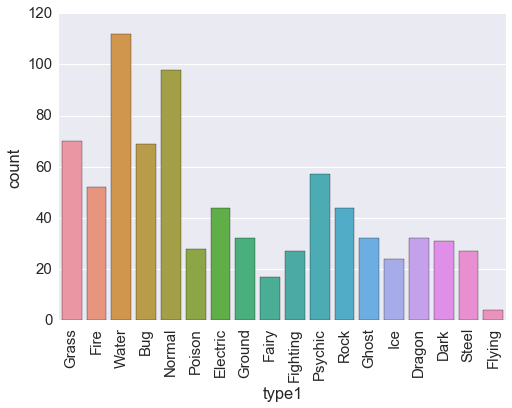

In [83]:
import seaborn as sns
plot_1 = sns.countplot(x='type1', data=df)
plt.setp(plot_1.get_xticklabels(), rotation=90)
plot_1;

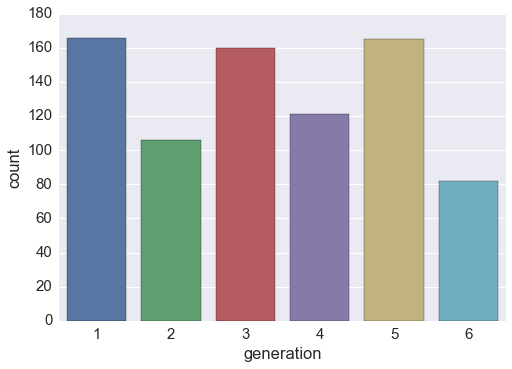

In [64]:
plot_2 = sns.countplot(x='generation', data=df)
plot_2;

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


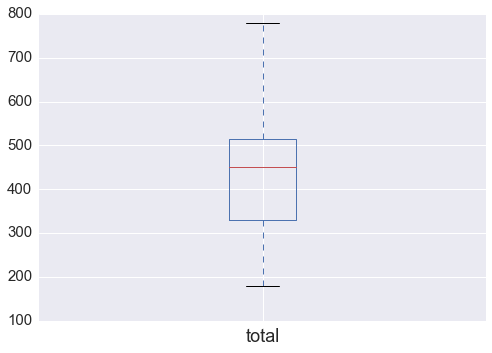

In [62]:
plot_3 = df.boxplot(column='total')
plot_3;

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


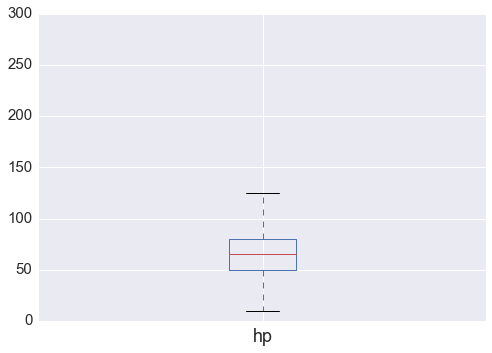

In [16]:
plot_4 = df.boxplot(column='hp')
plot_4;

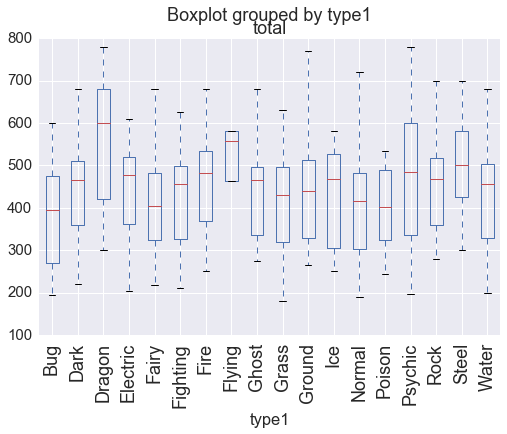

In [68]:
plot_5 = df.boxplot(column='total', by='type1', rot=90)
plot_5;

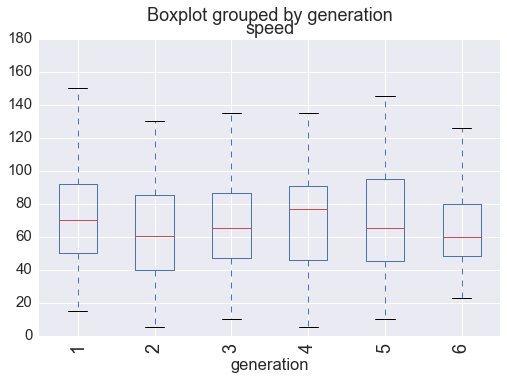

In [77]:
plot_6 = df.boxplot(column='speed', by='generation', rot=90)
plot_6;

## EDA/Statistics

In [79]:
mean_type_1 = df.groupby('type1')['total'].mean()
mean_type_1

type1
Bug         378.927536
Dark        445.741935
Dragon      550.531250
Electric    443.409091
Fairy       413.176471
Fighting    416.444444
Fire        458.076923
Flying      485.000000
Ghost       439.562500
Grass       421.142857
Ground      437.500000
Ice         433.458333
Normal      401.683673
Poison      399.142857
Psychic     475.947368
Rock        453.750000
Steel       487.703704
Water       430.455357
Name: total, dtype: float64

In [81]:
std_deviation_type_1 = df.groupby('type1')['defense'].std()
std_deviation_type_1

type1
Bug         33.617609
Dark        25.121982
Dragon      24.102938
Electric    24.757033
Fairy       18.979478
Fighting    18.578163
Fire        23.658200
Flying      21.360009
Ghost       32.551138
Grass       24.485192
Ground      33.786912
Ice         34.387708
Normal      23.771833
Poison      21.066128
Psychic     28.359401
Rock        36.447209
Steel       44.806548
Water       27.773809
Name: defense, dtype: float64

## Statistics/Random Sampling

In [18]:
sample_100 = df.sample(100)

In [91]:
sample_100.attack.describe()

count    100.000000
mean      73.700000
std       30.680333
min       20.000000
25%       50.000000
50%       71.000000
75%       90.000000
max      160.000000
Name: attack, dtype: float64

In [92]:
df.attack.describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: attack, dtype: float64

Our sample has attack mean and median both less than the whole data set. 

IQR for sample: 90 - 50 = 40. 

IQR for whole data set: 100 - 55 = 45.

The whole populatio data set has more dispersion than the sample one.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


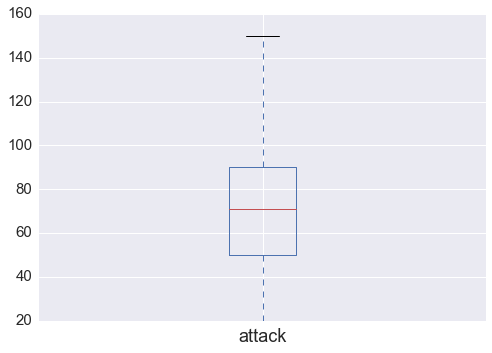

In [95]:
plot_7 = sample_100.boxplot(column='attack')
plot_7;

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


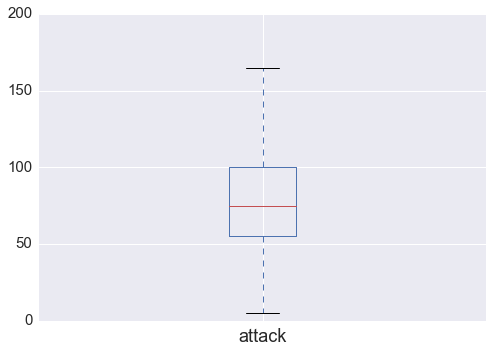

In [97]:
plot_8 = df.boxplot(column='attack')
plot_8;

In [98]:
sample_100.hp.describe()

count    100.000000
mean      65.470000
std       24.863447
min        1.000000
25%       50.000000
50%       65.000000
75%       78.000000
max      190.000000
Name: hp, dtype: float64

In [99]:
df.hp.describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: hp, dtype: float64

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


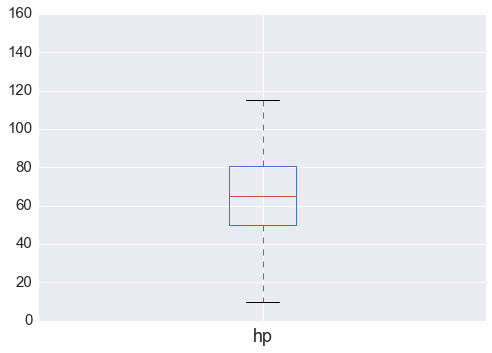

In [19]:
plot_9 = sample_100.boxplot(column='hp')
plot_9;

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


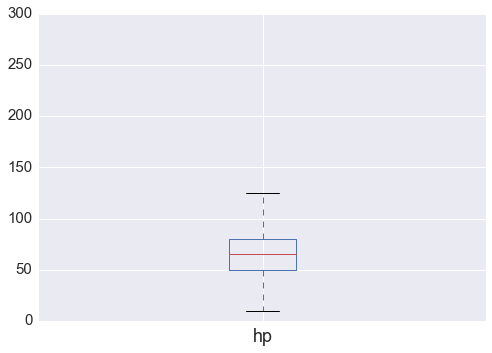

In [101]:
plot_10 = df.boxplot(column='hp')
plot_10;

## Probability

$\Omega = \{800 \}$ pokemon, 6 choosen randomly.

In [115]:
%%sql
SELECT COUNT(*) AS "Count of Water Type"
FROM pokemon
WHERE type1 = 'Water' OR type2 = 'Water'

Done.


Count of Water Type
126


In [116]:
%%sql
SELECT COUNT(*) AS "Count of Water Type1"
FROM pokemon
WHERE type1 = 'Water'

Done.


Count of Water Type1
112


In [117]:
%%sql
SELECT COUNT(*) AS "Count of Water Type2"
FROM pokemon
WHERE type2 = 'Water'

Done.


Count of Water Type2
14


In [9]:
%%sql
SELECT COUNT(*) AS 'Count of Water Both Type1 and Type2'
FROM pokemon
WHERE type1 = 'Water' AND type2 = 'Water'

Done.


Count of Water Both Type1 and Type2
0


Hint: calculate probability for 1 pokemon only first.

P(water type1) = 112/800 = 0.14

P(water type2) = 14/800 = 0.0175

P(water type1) $\cap$ P(water type2) = 0

P(water type1) $\cup$ P(water type2) = P(water type1) + P(water type2) - P(water type1) $\cap$ P(water type2) = 0.14 + 0.0175 - 0 = 0.1575

The probability of 1 pokemon to be water type is 15.75%.

The probability of 1 pokemon NOT to be water type is 1 - 15.75% = 84.25%.

We can calculate the probability of 6 pokemon been water type as 1 minus all of them NOT been water type:

$1-(0.8425)^6 = 1 - 0.3576 = 0.6424$

In [42]:
pd.crosstab(df['type1'],df['generation'],margins=True)

generation,1,2,3,4,5,6,All
type1,,,,,,,
Bug,14,12,12,10,18,3,69
Dark,0,6,6,3,13,3,31
Dragon,3,0,12,4,9,4,32
Electric,9,7,5,12,8,3,44
Fairy,2,5,0,1,0,9,17
Fighting,7,2,5,3,7,3,27
Fire,14,8,8,5,9,8,52
Flying,0,0,0,0,2,2,4
Ghost,4,1,5,7,5,10,32


Given that a pokemon is generation 5, what is the probability that is type1 Bug?

In [41]:
%%sql
SELECT COUNT(*) AS 'Generation 5 Count'
FROM pokemon
WHERE generation = 5

Done.


Generation 5 Count
165


P(generation 5) = 165/800

P(type1 = Bug $\cap$ generation 5) = 18/800

P(type1 = Bug | generation 5) = P(type1 = Bug $\cap$ generation 5)/P(generation 5) = 18/165 = 0.109 (10.9%)